# Homework 7 - Particle Filters
## AA 549/AE 514 - UW

#### Dan Calderone - djcal@uw.edu

## Problem 1:
Implement a particle filter for state localization using the following simple robot unicycle velocity control model.  

Dynamics: 

\begin{align*}
\dot{x} & = u_1 \cos(\theta) + w_1 \\
\dot{y} & = u_1 \sin(\theta) + w_2 \\
\dot{\theta} & = u_2 + w_3
\end{align*}

\begin{align*}
y = h(x)
\end{align*}

## Problem 2: (Extra Credit)
Implement a Rao-Blackwellized particle filter for the above problem.  You can keep particles for the 



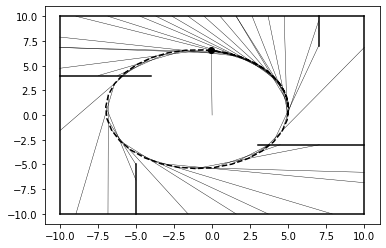

In [7]:
import numpy as np
import numpy.linalg as mat
import scipy.linalg as smat
from numpy.random import multivariate_normal as vecnormal # draw from a vector normal distribution
from numpy.random import normal as normal  # draw from a normal distribution
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as patches, matplotlib as mpl
from matplotlib.patches import Polygon
import numpy.random as rand


### ROOM PARAMETERS
xmin =-10; xmax = 10;
ymin =-10; ymax = 10;
thmin=0  ; thmax = 2*np.pi;

### LIDAR PARAMETERS...
nl  = 10; # number of points in lidear measurement...
radl= 2*np.pi/10; # width of lidar measurement...

### CONSTRUCTING ROOM...
tmp = [0.25,0.35,0.15,0.3];
CRNRS = np.array([[xmin,ymin],[xmax,ymin],[xmax,ymax],[xmin,ymax]]);
SEGS = np.array([CRNRS[1]-CRNRS[0],CRNRS[2]-CRNRS[1],
                 CRNRS[3]-CRNRS[2],CRNRS[0]-CRNRS[3]]);

WALLS = np.array([np.hstack([CRNRS[0],CRNRS[1]]),
                  np.hstack([CRNRS[1],CRNRS[2]]),
                  np.hstack([CRNRS[2],CRNRS[3]]),
                  np.hstack([CRNRS[3],CRNRS[0]]),
                  np.hstack([CRNRS[0]+tmp[0]*SEGS[0],CRNRS[0]+tmp[0]*SEGS[0]+tmp[0]*SEGS[1]]),
                  np.hstack([CRNRS[1]+tmp[1]*SEGS[1],CRNRS[1]+tmp[1]*SEGS[1]+tmp[1]*SEGS[2]]),
                  np.hstack([CRNRS[2]+tmp[2]*SEGS[2],CRNRS[2]+tmp[2]*SEGS[2]+tmp[2]*SEGS[3]]),
                  np.hstack([CRNRS[3]+tmp[3]*SEGS[3],CRNRS[3]+tmp[3]*SEGS[3]+tmp[3]*SEGS[0]])]);

## CREATING WALL POINTS...
wallpts = np.zeros([0,2]);
for i in range(WALLS.shape[0]):
    wallpts = np.block([[wallpts],[WALLS[i][:2]+np.outer(np.linspace(0,1,20),WALLS[i][2:]-WALLS[i][:2])]]);
nwpts   = wallpts.shape[0];


## DRAW WALLS FUNCTION...
def drawWalls(WALLS):
    for i in range(WALLS.shape[0]):
        plt.plot(WALLS[i][[0,2]],WALLS[i][[1,3]],'k')

## CONVERSIONS BETWEEN POLAR AND CARTESIAN COORDINATES
def cart2pol(x): return np.array([np.sqrt(x[0]**2 + x[1]**2), np.arctan2(x[1], x[0])]);
def pol2cart(rho): return np.array([rho[0] * np.cos(rho[1]), rho[0] * np.sin(rho[1])])

def angleBetween(th,bnds):
    # Checks if an angle is between two other angles... in radians
    mid = np.mod(2*np.pi + np.mod(th,2*np.pi),2*np.pi);
    a = np.mod(2*np.pi*10000 + bnds[0],2*np.pi);
    b = np.mod(2*np.pi*10000 + bnds[1],2*np.pi);
    if (a<=b): out = (a <= mid) and (mid <= b);
    else: out = (a <= mid) or (mid <= b)
    return out

def wedge(x,rad,X):
    # FILTERS POINTS IN A WEDGE IN FRONT OF THE SENSOR...
    nn   = X.shape[0];
    temp = np.array([cart2pol(y) for y in X-x[:2]])
    inds = np.array([angleBetween(temp[i,1],[x[2]-rad,x[2]+rad]) for i in range(nn)])
    temp = temp[inds];
    return temp
    
def LIDAR(x,rad,X):
    # CALCULATES POINTS IN AN ARC... 
    temp   = wedge(x,rad,X);
    thetas = np.linspace(np.mod(x[2],2*np.pi)-rad,np.mod(x[2],2*np.pi)+rad,nl);
    meas   = np.zeros([nl-1,2]);
    if len(temp)>0:
        for i in range(nl-1):
            inds  = np.array([angleBetween(temp[j,1],[thetas[i],thetas[i+1]]) for j in range(temp.shape[0])]);
            temp2 = temp[inds];
            if  temp2.shape[0]>1:
                nmeas  = temp2[np.min(temp2[:,0]) == temp2[:,0]];
                meas[i]= nmeas[0];
            elif temp2.shape[0]>0:
                nmeas  = temp2[np.min(temp2[:,0]) == temp2[:,0]];
                meas[i]= nmeas;        
    return meas


# discrete time function
nP = 70;
T  = 40; dt = 0.2; seg = 1; ddt = dt/seg;
ts = dt*np.array(list(range(T))); v = 6.; omg = 1.;
u  = np.block([[v*np.ones(T)],[omg*np.ones(T)+0.0*np.cos(ts)]]).T;

Q  = np.diag([0.1,0.1,0.1])
R  = 4.;
Ri = 1/R;
rQ = np.diag([0.01,0.01,0.01]);

#DYNAMICS AND MEASUREMENT
def phi(x,u,w,dt): #dist = distToWall(x,WALLS)[0];
    out = x + dt*(np.array([u[0]*np.cos(x[2]),u[0]*np.sin(x[2]),u[1]]));
    out[2] = np.mod(out[2],2*np.pi)
    return out

def h(x): return LIDAR(x,radl,wallpts) # + v

def updateFilter():
    #ADD PARTICLE FILTER CODE...
    #ADD PARTICLE FILTER CODE...
    #ADD PARTICLE FILTER CODE...
    #ADD PARTICLE FILTER CODE...    
    print('asdf')
    
## TRAJECTORY INITIALIZATION...
x  = np.zeros([T,3]);
x[0] = np.array([5.,0.,0.5*np.pi]);
y  = np.zeros([T,nl-1,2]);
Ix = np.zeros([T,2]);

#ADD FILTER INITIALIZATION...
#ADD FILTER INITIALIZATION...
#ADD FILTER INITIALIZATION...    

# simulation and filter...
for t in range(T-1):
    w = vecnormal(np.zeros(3),Q);
    v = rand.normal(0.,R);
    y[t]  = h(x[t]);
    Ix[t] = pol2cart(y[t][int(nl/2)])+x[t][:2]
    x[t+1]= phi(x[t],u[t],w,dt);
    ## updateFilter()...

# drawing walls...    
drawWalls(WALLS)
# plotting trajectory...        
cmap = cm.get_cmap('plasma')
plt.plot(x[:,0],x[:,1],'k--');        
plt.plot(x[-1,0],x[-1,1],'ko')
for t in range(T):
    plt.plot([x[t,0],Ix[t,0]],[x[t,1],Ix[t,1]],'-',linewidth=.4,color='k');

    
